# Code for a Simple Binary Evolutionary Algorithm

In [86]:
import matplotlib.pyplot as plt
%matplotlib inline
from random import random,randint, sample, shuffle, uniform
from operator import itemgetter

# Generate Random Individuals

In [68]:
# Initialize population
def generate_population(size_pop, size_cromo):
    #List of tuples: (Chromosome, Fitness)
    return [(generate_individual(size_cromo),0) for i in range(size_pop)]

#Generate a new individual
def generate_individual(size_chromo):
    # random initialization
    indiv = [randint(0,1) for i in range(size_chromo)]
    return indiv

# Parent Selection

In [69]:
# Tournament Selection
def tournament_selection(t_size):
    #To implement. It should return a list of individuals.
    pass


# Survivor Selection

In [70]:
# Survivals: elitism
def survivors_selection_elite(elite):
    #To implement. It should return a new population.

# Variation Operators

## Recombination 

In [71]:
# Variation Operators: Crossover
def single_point_cross(indiv_1, indiv_2,prob_cross):
    # To implement: It should return a tuple with two individuals.
    pass
    

## Mutation

In [72]:
# Variation operators: Binary mutation        
def bin_mutation(indiv,prob_muta):
    # Mutation by gene. It should return the chromosome mutated

# Evaluation of Solution

In [81]:
# ---------  Evaluation -----------------
def phenotype(indiv):
    """from a binary string to a list of [id,weight,value]."""
    pheno = [[id, problem['weights'][id], problem['values'][id]] for id in range(len(indiv)) if indiv[id] == 1]
    return pheno

def evaluate_zero(feno):
    """ feno = [...,[ıd,weight,value],...]"""
    total_weight = sum([weight for id_,weight,value in feno])
    if total_weight > problem['capacity']:
        return 0
    return sum([value for id,weight,value in feno])

def evaluate_kp(problem):
    """
    problem is a dictionary describing the instance of the KP.
    keys = values (list of invidual's values), weigths (list of individual's weights),capacity (a float with the total capacity)
    """
    def fitness(indiv):
        quali = evaluate_zero(phenotype(indiv))
        return quali
    return fitness

# Statistics

In [79]:
#Returns de best individual in the population
def best_pop(populacao):
    populacao.sort(key=itemgetter(1),reverse=True)
    return populacao[0]

def average_pop(populacao):
    return sum([fit for cromo,fit in populacao])/len(populacao)

# Main Cycle

In [76]:
# Simple [Binary] Evolutionary Algorithm        
def simple_evolutionary_algorithm(num_generations, pop_size, size_chrom, prob_mut, recom_prob, parent_sel,recombination,mutation,survivors_sel, fitness_func):
    # inicialize population: indiv = (chromosome,fit)
    population = generate_population(pop_size, size_chrom)
    # evaluate population
    population = [(indiv[0], fitness_func(indiv[0])) for indiv in population]              
    # For Statistics
    stat = [best_pop(population)[1]]
    stat_aver = [average_pop(population)]
                  
    for i in range(num_generations):
        # parents selection
        mate_pool = parent_sel(population)
        # Variation
        # ------ Crossover
        offspring_pop = []
        for i in  range(0,pop_size - 1,2):
            indiv_1= mate_pool[i]
            indiv_2 = mate_pool[i+1]
            offspring = recombination(indiv_1,indiv_2, recom_prob)
            offspring_pop.extend(offspring) 
        # ------ Mutation
        new_population = []
        for chromo,fit in offspring_pop:
            new_ind = mutation(chromo, prob_mut)
            new_population.append((new_ind,fitness_func(new_ind)))
        # New population
        population = survivors_sel(population, new_population)
        # Evaluate the new population
        population = [(indiv[0], fitness_func(indiv[0])) for indiv in population]
        # Statistics
        stat.append(best_pop(population)[1])
        stat_aver.append(average_pop(population))        
    return best_pop(population), stat, stat_aver

# Generate DataSet

In [98]:
def generate_strong_cor(size_items,max_value,amplitude):
    weights = [uniform(1,max_value) for i in range(size_items)]
    values = [weights[i] + amplitude for i in range(size_items)]
    capacity = int(0.5 * sum(weights))
    return {'weights':weights, 'values':values, 'capacity': capacity}

In [103]:
def generate_uncor(size_items,max_value):
    weights = [uniform(1,max_value) for i in range(size_items)]
    values = [uniform(1,max_value) for i in range(size_items)]
    capacity = int(0.5 * sum(weights))
    return {'weights':weights, 'values':values, 'capacity': capacity}

# One Execution

In [101]:
problem = generate_uncor(100,10)
#print(problem)
fit = evaluate_kp(problem)
best_indi, mbf, pop_average = simple_evolutionary_algorithm(1000, 100, 100, 0.01, 0.9, tournament_selection(3), single_point_cross, bin_mutation, survivors_selection_elite(0.1), fit)

# Statistics 

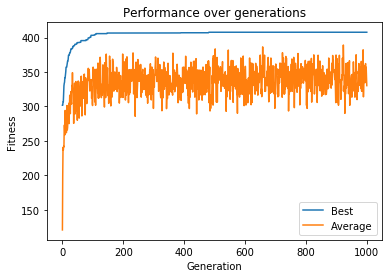

In [102]:
generations = list(range(len(mbf)))
plt.plot(generations, mbf, label='Best')
plt.plot(generations,pop_average,label='Average')
plt.title('Performance over generations')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.legend(loc='best')
plt.show()